<a href="https://colab.research.google.com/github/hwan0309/DataAnalyst_T/blob/main/%ED%83%80%EC%9D%B4%ED%83%80%EB%8B%89.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
submission = pd.read_csv('submission.csv')

In [ ]:
#train.head()
#test.head()
submission.head()


,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [ ]:
#ls
train.columns


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
train['Sex'] = train['Sex'].replace('male',0)
test['Sex'] = test['Sex'].replace('male',0)

In [ ]:
train['Sex'] = train['Sex'].replace('female',1)
test['Sex'] = test['Sex'].replace('female',1)

<ipython-input-36-70e644ca5a5f>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train['Sex'] = train['Sex'].replace('female',1)
<ipython-input-36-70e644ca5a5f>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  test['Sex'] = test['Sex'].replace('female',1)


In [ ]:
train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


# 새 섹션

In [ ]:
train.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
train2 = train.dropna(subset=['Embarked'])

In [ ]:
train2.shape

(889, 12)

In [ ]:
train2.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.25,NaN,S


In [ ]:
import copy
train2 = train2.copy()
train2.loc[train2['Embarked'] == 'C','Embarked']=0
train2.loc[train2['Embarked'] == 'Q','Embarked']=1
train2.loc[train2['Embarked'] == 'S','Embarked']=2

In [ ]:
train2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    int64  
 5   Age          712 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Cabin        202 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(6), object(4)
memory usage: 90.3+ KB


In [ ]:
train2['Embarked'] = train2['Embarked'].astype(int)

In [ ]:
#train2.corrwith(train2['Embarked'])
train[train['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",1,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",1,62.0,0,0,113572,80.0,B28,NaN


In [ ]:
train[train['Fare']==80.0]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",1,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",1,62.0,0,0,113572,80.0,B28,NaN


In [ ]:
train[train['Pclass']==1]['Embarked'].value_counts()

,count
Embarked,
S,127
C,85
Q,2


In [ ]:
train[train['Survived']==1]['Embarked'].value_counts()

,count
Embarked,
S,217
C,93
Q,30


In [ ]:
train['Embarked'].value_counts()

,count
Embarked,
S,644
C,168
Q,77


In [ ]:
train['Embarked'] = train['Embarked'].fillna("S")

In [ ]:
train.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
train.loc[train.Embarked == 'C', 'Embarked'] = 0
train.loc[train.Embarked == 'Q', 'Embarked'] = 1
train.loc[train.Embarked == 'S', 'Embarked'] = 2

In [ ]:
train['Embarked'] = train['Embarked'].astype('int64')

In [ ]:
test.isnull().sum()

,0
PassengerId,0
Pclass,0
Name,0
Sex,0
Age,86
SibSp,0
Parch,0
Ticket,0
Fare,1
Cabin,327


In [ ]:
test[test['Fare'].isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
152,1044,3,"Storey, Mr. Thomas",0,60.5,0,0,3701,NaN,NaN,S


In [ ]:
fare = pd.DataFrame(test[test['Pclass']==3]['Fare'].value_counts().nlargest(12))
fare = fare.reset_index()
fare

,Fare,count
0,7.7500,21
1,8.0500,17
2,7.8958,11
3,7.7750,10
4,7.2250,9
5,7.2292,9
6,8.6625,8
7,7.8542,8
8,7.8792,6
9,7.2500,5


In [ ]:
test['Fare'] = test['Fare'].fillna("7.753825")

In [ ]:
test.isnull().sum()

,0
PassengerId,0
Pclass,0
Name,0
Sex,0
Age,86
SibSp,0
Parch,0
Ticket,0
Fare,0
Cabin,327


In [ ]:
def normalize(x):
  return (x-x.min())/(x.max()-x.min())

In [ ]:
def standardscaler(x):
  return (x-x.mean())/x.std()

In [ ]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train[['Fare']])
train_fare = ss.transform(train[['Fare']])
test_fare = ss.transform(test[['Fare']])

In [ ]:
train['Fare2'] = train_fare
test['Fare2'] = test_fare

In [ ]:
train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Fare2
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,2,-0.502445
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,0,0.786845
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,2,-0.488854


In [ ]:
data = train[['Pclass','Sex','SibSp','Parch','Embarked','Fare2','Survived']]

In [ ]:
train['Age'].value_counts(ascending=True)

,count
Age,
66.0,1
12.0,1
70.5,1
36.5,1
20.5,1
...,...
28.0,25
30.0,25
18.0,26


In [ ]:
train['Age'].min()

0.42

In [ ]:
train['Age'].max()

80.0

<ipython-input-94-e5f183ee263d>:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  CountStatus = pd.value_counts(train['Age'].values, sort=True)


<Axes: >

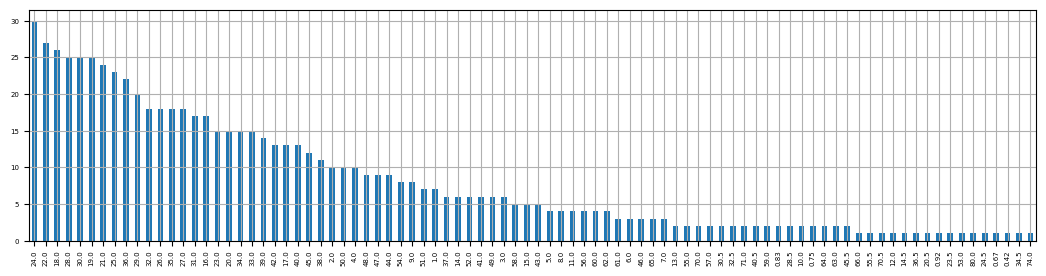

In [ ]:
CountStatus = pd.value_counts(train['Age'].values, sort=True)
CountStatus.plot.bar()
CountStatus.plot.bar(grid=True, figsize=(13,3), fontsize=5)

In [ ]:
train['Age'].values[:10]

array([22., 38., 26., 35., 35., nan, 54.,  2., 27., 14.])

<ipython-input-97-f942bcd039e1>:2: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  CountStatus = pd.value_counts(train['Age'].values[:10], sort=True)


(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, '35.0'),
  Text(1, 0, '22.0'),
  Text(2, 0, '38.0'),
  Text(3, 0, '26.0'),
  Text(4, 0, '54.0'),
  Text(5, 0, '2.0'),
  Text(6, 0, '27.0'),
  Text(7, 0, '14.0')])

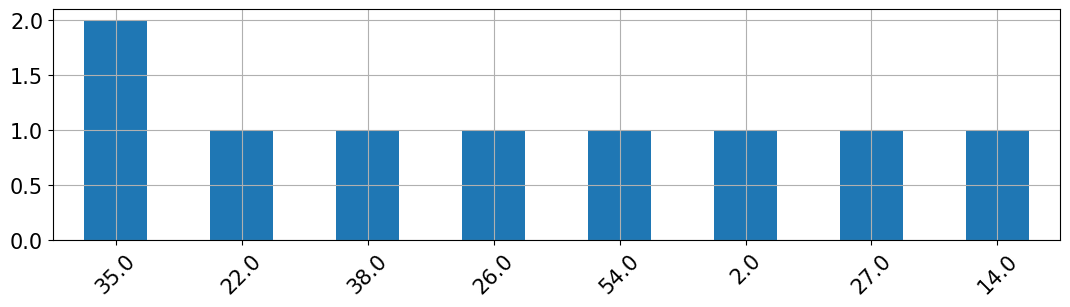

In [ ]:
import matplotlib.pyplot as plt
CountStatus = pd.value_counts(train['Age'].values[:10], sort=True)
CountStatus.plot.bar()
CountStatus.plot.bar(grid=True, figsize=(13,3), fontsize=15)
plt.xticks(rotation=45)

In [ ]:
train['Age'].isnull().sum()

np.int64(177)

In [1]:
#end